# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import scipy.stats as st
import requests
import datetime as dt
import seaborn as sns





In [2]:
# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude

from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)


## Generate Cities List

In [3]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)
#len(cities)

596

In [4]:
url = "http://api.openweathermap.org/data/2.5/weather?"

# Build query URL
query_url = url + "appid=" + weather_api_key + "&q="
query_url

'http://api.openweathermap.org/data/2.5/weather?appid=b93d39364f506080e4b83532222dd9b2&q='

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
citynew =[]
cloudiness =[]
dates =[]
humidities =[]
lats =[]
lngs =[]
maxtemps =[]
windspeed =[]
countries =[]
counter=1
city_name=[]
test_city=["rikitea", "saint-pierre", "mataura", "hilo", "vic", "timra"]





for city in cities:
    try:
        url = "http://api.openweathermap.org/data/2.5/weather?"
        s=url + "appid=" + weather_api_key + "&q=" + city
        response = requests.get(s).json()
        #print (each)
        #print (response ["name"])
        citynew.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        countries.append(response["sys"]["country"])
        dates.append(response["dt"])
        humidities.append(response["main"]["humidity"])
        maxtemps.append(response["main"]["temp_max"])
        lats.append(response["coord"]["lat"])
        lngs.append(response["coord"]["lon"])
        windspeed.append(response["wind"]["speed"])
        city_name = response["name"]
    except:
        print(f"city not found")
        
        
        time.sleep(1.00)
        counter=counter+1
        
        
    print(f"{counter}/{city}")
    print(f"{url}&q={city}")
        
    
        

1/urengoy
http://api.openweathermap.org/data/2.5/weather?&q=urengoy
1/saint george
http://api.openweathermap.org/data/2.5/weather?&q=saint george
city not found
2/mys shmidta
http://api.openweathermap.org/data/2.5/weather?&q=mys shmidta
2/ushuaia
http://api.openweathermap.org/data/2.5/weather?&q=ushuaia
2/kavaratti
http://api.openweathermap.org/data/2.5/weather?&q=kavaratti
2/torbay
http://api.openweathermap.org/data/2.5/weather?&q=torbay
2/mar del plata
http://api.openweathermap.org/data/2.5/weather?&q=mar del plata
2/albany
http://api.openweathermap.org/data/2.5/weather?&q=albany
2/rikitea
http://api.openweathermap.org/data/2.5/weather?&q=rikitea
2/hermanus
http://api.openweathermap.org/data/2.5/weather?&q=hermanus
2/kaitangata
http://api.openweathermap.org/data/2.5/weather?&q=kaitangata
2/yellowknife
http://api.openweathermap.org/data/2.5/weather?&q=yellowknife
2/antigonish
http://api.openweathermap.org/data/2.5/weather?&q=antigonish
2/falavarjan
http://api.openweathermap.org/data/2

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
citydata_dict = {"City": citynew,"Cloudiness":cloudiness, "Country":countries,"Date":dates, "Humidity": humidities,"Lat":lats, "Lng":lngs, "Max Temp": maxtemps,
"Wind Speed":windspeed}
city_df=pd.DataFrame(citydata_dict)
city_df.head()


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Urengoy,69,RU,1596250298,61,65.97,78.37,289.79,5.02
1,Saint George,1,US,1596250298,10,37.10,-113.58,314.15,5.70
2,Ushuaia,75,AR,1596250022,65,-54.80,-68.30,278.15,6.20
3,Kavaratti,100,IN,1596250080,81,10.57,72.64,301.41,8.13
4,Torbay,90,CA,1596250300,100,47.67,-52.73,288.71,4.60


In [7]:
city_df.to_csv("outputcityweather.csv",index=False, header=True)
csvpath="outputcityweather.csv"
csvread=pd.read_csv(csvpath)
df=pd.DataFrame(csvread)
df


,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Urengoy,69,RU,1596250298,61,65.97,78.37,289.79,5.02
1,Saint George,1,US,1596250298,10,37.10,-113.58,314.15,5.70
2,Ushuaia,75,AR,1596250022,65,-54.80,-68.30,278.15,6.20
3,Kavaratti,100,IN,1596250080,81,10.57,72.64,301.41,8.13
4,Torbay,90,CA,1596250300,100,47.67,-52.73,288.71,4.60
...,...,...,...,...,...,...,...,...,...
547,Ancud,90,CL,1596250403,93,-41.87,-73.82,282.59,5.70
548,Nueva Gerona,0,CU,1596250404,74,21.88,-82.80,302.27,8.95
549,Nanortalik,18,GL,1596250404,86,60.14,-45.24,279.44,5.87
550,Mandsaur,60,IN,1596250405,80,24.07,75.07,301.00,5.10


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

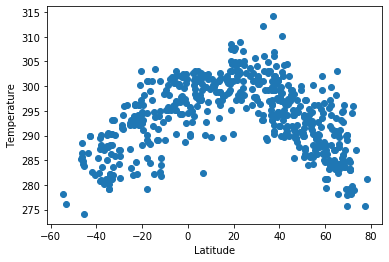

In [8]:
x_values = df['Lat']
y_values = df['Max Temp']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Temperature')
plt.show()


In [26]:
plt.savefig('output Plots Weather/lat_vs_temp.png', dpi=600)

<Figure size 432x288 with 0 Axes>

## Latitude vs. Humidity Plot

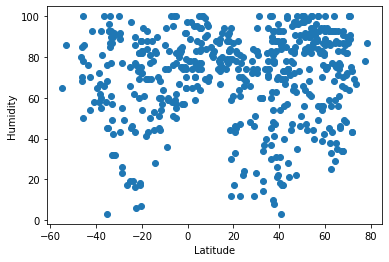

In [10]:
x_values = df['Lat']
y_values = df['Humidity']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Humidity')
plt.show()

In [11]:
plt.savefig('lat_vs_humidity.png',dpi=600)

<Figure size 432x288 with 0 Axes>

## Latitude vs. Cloudiness Plot

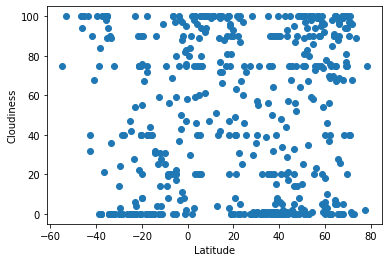

In [12]:
x_values = df['Lat']
y_values = df['Cloudiness']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
plt.show()

In [13]:
plt.savefig('lat_vs_cloudiness.png',dpi=600)

<Figure size 432x288 with 0 Axes>

## Latitude vs. Wind Speed Plot

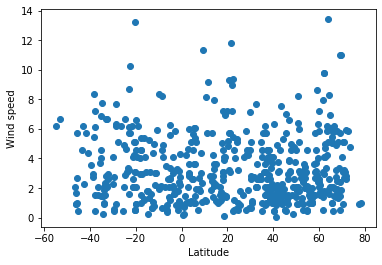

In [14]:
x_values = df['Lat']
y_values = df['Wind Speed']
plt.scatter(x_values,y_values)
plt.xlabel('Latitude')
plt.ylabel('Wind speed')
plt.show()

In [15]:
plt.savefig('lat_vs_windspeed.png',dpi=600)

<Figure size 432x288 with 0 Axes>

## Linear Regression

In [16]:
# Create Northern and Southern Hemisphere DataFrames
northernhem = df[df["Lat"] >= 0.0]
northernhem.reset_index(inplace=True)
northernhem

,index,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,0,Urengoy,69,RU,1596250298,61,65.97,78.37,289.79,5.02
1,1,Saint George,1,US,1596250298,10,37.10,-113.58,314.15,5.70
2,3,Kavaratti,100,IN,1596250080,81,10.57,72.64,301.41,8.13
3,4,Torbay,90,CA,1596250300,100,47.67,-52.73,288.71,4.60
4,6,Albany,0,US,1596250300,67,42.60,-73.97,296.48,1.64
...,...,...,...,...,...,...,...,...,...,...
374,544,Doka,89,SD,1596250403,87,13.52,35.77,293.51,2.50
375,545,Mersin Province,75,TR,1596250403,100,36.86,34.65,299.15,1.00
376,548,Nueva Gerona,0,CU,1596250404,74,21.88,-82.80,302.27,8.95
377,549,Nanortalik,18,GL,1596250404,86,60.14,-45.24,279.44,5.87


In [17]:
southernhem = df[df["Lat"] <= 0.0]
southernhem.reset_index(inplace=True)
southernhem

,index,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,2,Ushuaia,75,AR,1596250022,65,-54.80,-68.30,278.15,6.20
1,5,Mar del Plata,0,AR,1596250159,93,-38.00,-57.56,280.93,1.50
2,7,Rikitea,100,PF,1596250300,86,-23.12,-134.97,296.34,3.24
3,8,Hermanus,0,ZA,1596250043,96,-34.42,19.23,279.26,1.43
4,9,Kaitangata,100,NZ,1596250301,70,-46.28,169.85,286.48,0.89
...,...,...,...,...,...,...,...,...,...,...
168,542,Ahipara,100,NZ,1596250403,76,-35.17,173.17,287.95,6.90
169,543,Prieska,0,ZA,1596250403,43,-29.66,22.75,281.44,0.55
170,546,Tiarei,40,PF,1596250403,69,-17.53,-149.33,301.15,4.60
171,547,Ancud,90,CL,1596250403,93,-41.87,-73.82,282.59,5.70


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

LinregressResult(slope=-0.22766120815941873, intercept=303.83188833181316, rvalue=-0.6572065627149983, pvalue=3.165254741879207e-48, stderr=0.013446864890580022)


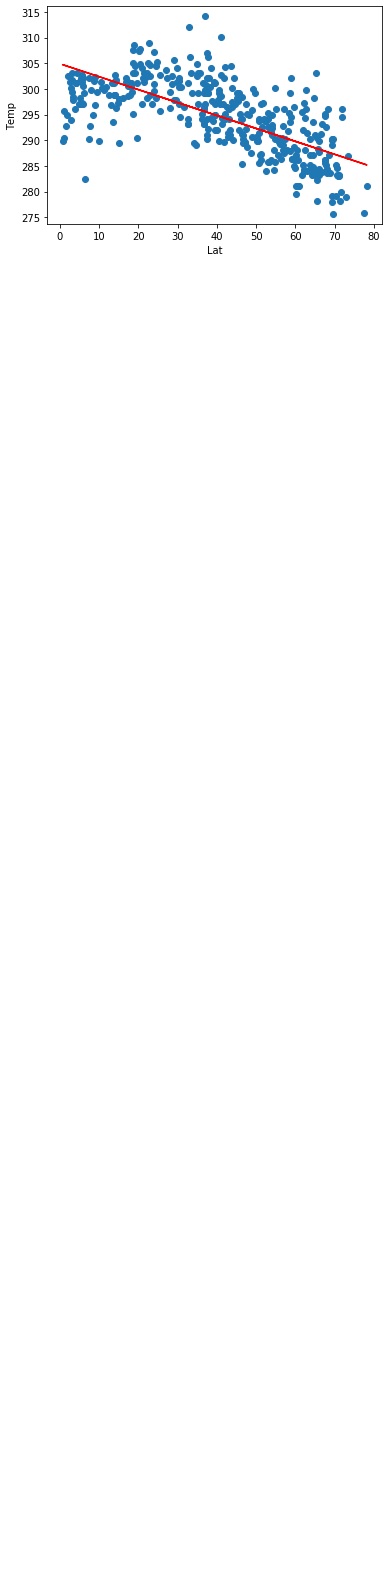

<Figure size 432x288 with 0 Axes>

In [18]:
lineregress=st.linregress(northernhem['Lat'],northernhem['Max Temp'])
print(lineregress)
slope=-0.2521431210842786
intercept=304.90398409094297
x_values = northernhem['Lat']
y_values = northernhem['Max Temp']
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", size="20")
plt.xlabel('Lat')
plt.ylabel('Temp')
plt.show()

plt.savefig('lat_vs_temNH.png',dpi=600)


LinregressResult(slope=0.35687994072906287, intercept=299.0423190296874, rvalue=0.7072025547193203, pvalue=1.5299022245319633e-27, stderr=0.027283898773427576)


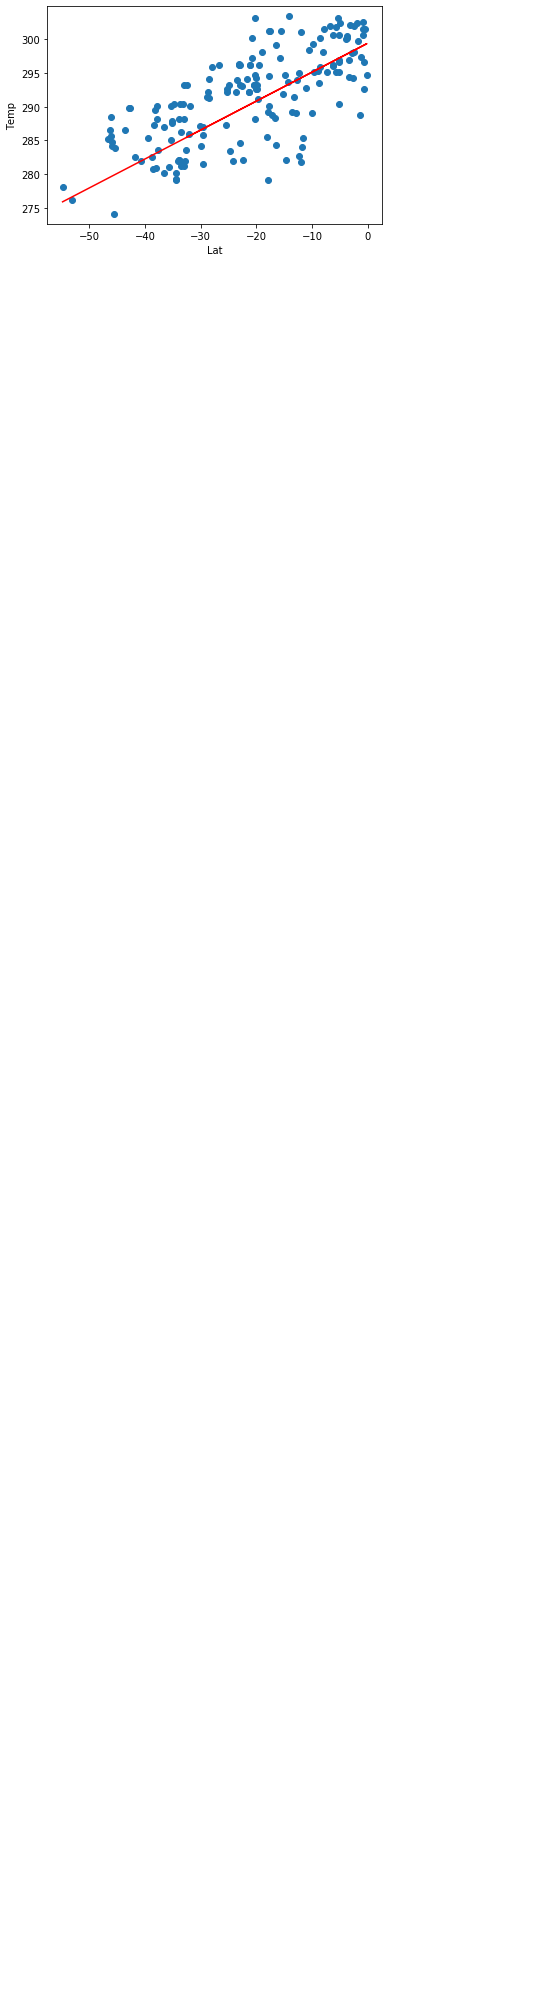

<Figure size 432x288 with 0 Axes>

In [19]:
lineregress=st.linregress(southernhem['Lat'],southernhem['Max Temp'])
print(lineregress)
slope=0.4288014973130267 
intercept=299.4140518971515
x_values = southernhem['Lat']
y_values = southernhem['Max Temp']
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Temp')
plt.show()

plt.savefig('lat_vs_temSH.png',dpi=600)

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

LinregressResult(slope=-0.02775759472329205, intercept=73.108890383284, rvalue=-0.025539201540700846, pvalue=0.6201528546803614, stderr=0.055957996840926665)


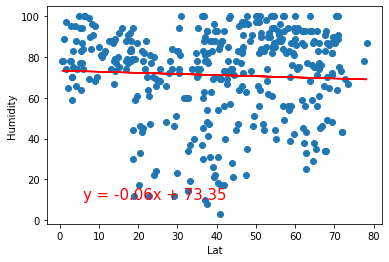

<Figure size 432x288 with 0 Axes>

In [20]:
lineregress=st.linregress(northernhem['Lat'],northernhem['Humidity'])
print(lineregress)
slope=-0.055397082659377254
intercept=73.3456039029042
x_values = northernhem['Lat']
y_values = northernhem['Humidity']
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.show()

plt.savefig('lat_vs_humNH.png',dpi=600)


####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

LinregressResult(slope=0.05185113340819275, intercept=69.322197713559, rvalue=0.03212869389449935, pvalue=0.6747544660895544, stderr=0.12335105302565105)


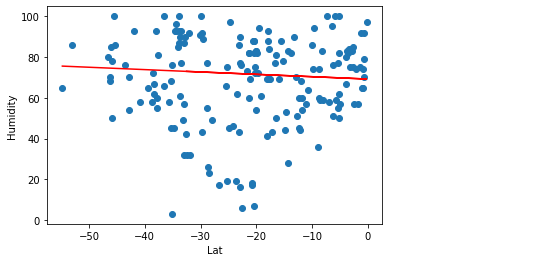

<Figure size 432x288 with 0 Axes>

In [21]:
lineregress=st.linregress(southernhem['Lat'],southernhem['Humidity'])
print(lineregress)
slope=-0.11589904329804855
intercept=69.18384764540123
x_values = southernhem['Lat']
y_values = southernhem['Humidity']
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Humidity')
plt.show()

plt.savefig('lat_vs_humSH.png',dpi=600)

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

LinregressResult(slope=-0.12570874981014388, intercept=57.01558065944572, rvalue=-0.06427046736421323, pvalue=0.21189540709718985, stderr=0.10052742259621683)


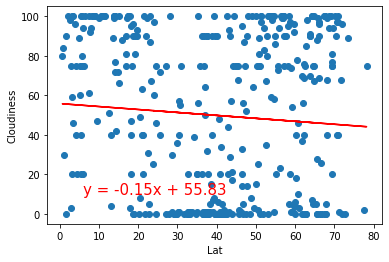

<Figure size 432x288 with 0 Axes>

In [22]:
lineregress=st.linregress(northernhem['Lat'],northernhem['Cloudiness'])
print(lineregress)
slope=-0.14968380891248298
intercept=55.82901900792869
x_values = northernhem['Lat']
y_values = northernhem['Cloudiness']
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.show()
plt.savefig('lat_vs_windspeedNH.png',dpi=600)

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

LinregressResult(slope=-0.2821562781122742, intercept=34.23544237873891, rvalue=-0.09826685972215007, pvalue=0.19835789199471404, stderr=0.2185131310780259)


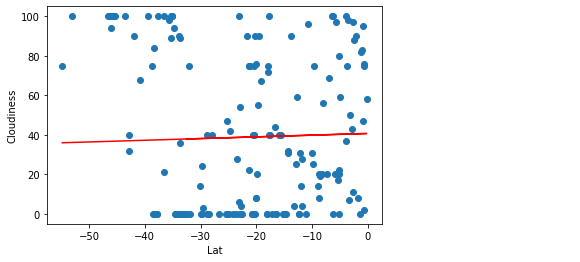

<Figure size 432x288 with 0 Axes>

In [23]:
lineregress=st.linregress(southernhem['Lat'],southernhem['Cloudiness'])
print(lineregress)
slope=0.0859442668545403
intercept=40.69645203017407
x_values = southernhem['Lat']
y_values = southernhem['Cloudiness']
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", size="20")
plt.xlabel('Lat')
plt.ylabel('Cloudiness')
plt.show()

plt.savefig('lat_vs_cloudinessSH.png',dpi=600)

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

LinregressResult(slope=0.002616826524711168, intercept=3.101178332523786, rvalue=0.023675936291888557, pvalue=0.6459015725937989, stderr=0.005690826424793978)


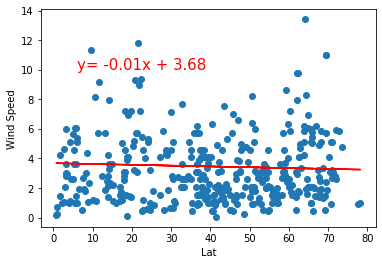

<Figure size 432x288 with 0 Axes>

In [24]:
lineregress=st.linregress(northernhem['Lat'],northernhem['Wind Speed'])
print(lineregress)
slope=-0.005540405162775291
intercept=3.681337232251905
x_values = northernhem['Lat']
y_values = northernhem['Wind Speed']
regress_values = x_values * slope + intercept
line_eq = "y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.show()
plt.savefig('lat_vs_windspeedNH.png',dpi=600)

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

LinregressResult(slope=-0.021842886784632025, intercept=2.7866746174325203, rvalue=-0.12953610081528374, pvalue=0.08939574691004033, stderr=0.012786350332798919)


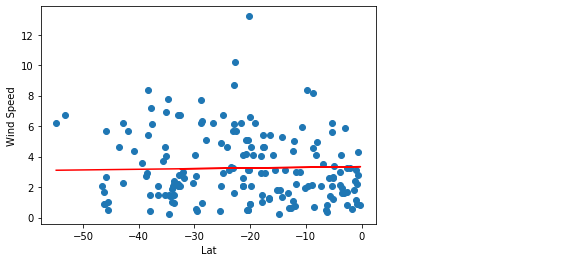

<Figure size 432x288 with 0 Axes>

In [25]:
lineregress=st.linregress(southernhem['Lat'],southernhem['Wind Speed'])
print(lineregress)
slope=0.004294083379959969
intercept=3.3388259410449543
x_values = southernhem['Lat']
y_values = southernhem['Wind Speed']
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red", size="20")
plt.xlabel('Lat')
plt.ylabel('Wind Speed')
plt.show()

plt.savefig('lat_vs_windspeedSH.png', dpi=600)